In [1]:
%load_ext autoreload

from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from AbstractArchitecture import AbstractArchitecture
from DenseEncoder import DenseEncoder
from DenseDecoder import DenseDecoder
from NormalizedMeanSquaredError import NormalizedMeanSquaredError as NMSE
from plot_model_prediction import plot_model_prediction

In [2]:
data_name = 'NLSL_expt1'  ## FILL IN HERE (from file name)
data_folder = './data/'

# data is num_steps x num_examples x n
data_train_u = np.load(data_folder + "{}_train1_u.npy".format(data_name))
data_train_f = np.load(data_folder + "{}_train1_f.npy".format(data_name))

# data is num_steps x num_examples x n
data_val_u = np.load(data_folder + "{}_val_u.npy".format(data_name))
data_val_f = np.load(data_folder + "{}_val_f.npy".format(data_name))

# data is num_steps x num_examples x n
data_test_u1 = np.load(data_folder + "{}_test1_u.npy".format(data_name))
data_test_f1 = np.load(data_folder + "{}_test1_f.npy".format(data_name))

data_test_u = np.load(data_folder + "{}_test2_u.npy".format(data_name))
data_test_f = np.load(data_folder + "{}_test2_f.npy".format(data_name))

In [3]:
# Compute data size (which is size of the full layers)
_, n = data_train_u.shape

# Specify latent space size
l = 20

# Specify options for constructing encoders and decoders
activation = "relu"
initializer = "he_normal"
regularizer = None
encoder_layers = 3
decoder_layers = 4
add_identity = True
train_autoencoders_only = False

## Set optimizer
optimizer = keras.optimizers.Adam
optimizer_opts = dict(learning_rate=0.0003, beta_1=0.9, beta_2=0.999, amsgrad=False)

## Set loss function(s) to use:
loss_fn = NMSE
loss_fn_options = {}

# Callback functions
cbs = [keras.callbacks.EarlyStopping(patience=10)]

# Fit method options
fit_options = dict(batch_size = 64, epochs = 50)

In [4]:
# Collect all the options
act_layer = dict(activation=activation, kernel_initializer=initializer, kernel_regularizer=regularizer)
lin_layer = dict(activation=None, kernel_initializer=initializer, kernel_regularizer=regularizer)

encoder_config = {'units_full': n,
                  'num_layers': encoder_layers,
                  'actlay_config': act_layer,
                  'linlay_config': lin_layer,
                  'add_init_fin': add_identity}

decoder_config = {'units_full': n,
                  'num_layers': decoder_layers,
                  'actlay_config': act_layer,
                  'linlay_config': lin_layer,
                  'add_init_fin': add_identity}

In [5]:
# Set model architecture options
architecture_opts = {"units_latent": l,
                     "u_encoder_block": DenseEncoder(**encoder_config),
                     "u_decoder_block": DenseDecoder(**decoder_config),
                     "F_encoder_block": DenseEncoder(**encoder_config),
                     "F_decoder_block": DenseDecoder(**decoder_config),
                     "train_autoencoders_only": train_autoencoders_only
                     }

In [6]:
# Depending on whether
if train_autoencoders_only:
    loss_fns = 2*[loss_fn(**loss_fn_options)]
    val_data = [(data_val_u, data_val_f), 
                (data_val_u, data_val_f)]
else:
    loss_fns = 4*[loss_fn(**loss_fn_options)]
    val_data = [(data_val_u, data_val_f), 
                (data_val_u, data_val_f, data_val_f, data_val_u)]

In [7]:
# Instantiate object
model = AbstractArchitecture(**architecture_opts)

# Compile the model
model.compile(loss=loss_fns, optimizer=optimizer(**optimizer_opts))

In [8]:
%%time
hist = model.fit(x=[data_train_u, data_train_f], 
                 y=[data_train_u, data_train_f, data_train_f, data_train_u], 
                 validation_data=val_data,
                 #callbacks=cbs,
                 **fit_options)

Train on 8906 samples, validate on 2227 samples
Epoch 1/50
8906/8906 [==============================] - 2s 216us/sample - loss: 1311.2947 - output_1_loss: 2.8362 - output_2_loss: 4.7561 - output_3_loss: 1.0146 - output_4_loss: 1293.4052 - val_loss: 193.9524 - val_output_1_loss: 1.0368 - val_output_2_loss: 1.4274 - val_output_3_loss: 0.9645 - val_output_4_loss: 192.4670
Epoch 2/50
8906/8906 [==============================] - 1s 60us/sample - loss: 88.4607 - output_1_loss: 1.0172 - output_2_loss: 1.1030 - output_3_loss: 0.9038 - output_4_loss: 83.6515 - val_loss: 75.9376 - val_output_1_loss: 1.0265 - val_output_2_loss: 0.9686 - val_output_3_loss: 0.8263 - val_output_4_loss: 72.6037
Epoch 3/50
8906/8906 [==============================] - 1s 60us/sample - loss: 43.4701 - output_1_loss: 1.0012 - output_2_loss: 0.8591 - output_3_loss: 0.7675 - output_4_loss: 39.1295 - val_loss: 44.5717 - val_output_1_loss: 0.9781 - val_output_2_loss: 0.8120 - val_output_3_loss: 0.7113 - val_output_4_loss: 41

Epoch 27/50
8906/8906 [==============================] - 1s 57us/sample - loss: 2.5384 - output_1_loss: 0.2857 - output_2_loss: 0.1049 - output_3_loss: 0.0681 - output_4_loss: 1.9692 - val_loss: 2.5250 - val_output_1_loss: 0.2713 - val_output_2_loss: 0.1119 - val_output_3_loss: 0.0691 - val_output_4_loss: 1.9677
Epoch 28/50
8906/8906 [==============================] - 1s 56us/sample - loss: 1.9521 - output_1_loss: 0.2584 - output_2_loss: 0.0875 - output_3_loss: 0.0614 - output_4_loss: 1.4372 - val_loss: 2.4682 - val_output_1_loss: 0.2503 - val_output_2_loss: 0.0943 - val_output_3_loss: 0.0627 - val_output_4_loss: 1.9566
Epoch 29/50
8906/8906 [==============================] - 1s 58us/sample - loss: 1.8319 - output_1_loss: 0.2461 - output_2_loss: 0.0815 - output_3_loss: 0.0575 - output_4_loss: 1.3449 - val_loss: 3.1693 - val_output_1_loss: 0.2397 - val_output_2_loss: 0.0859 - val_output_3_loss: 0.0589 - val_output_4_loss: 2.6800
Epoch 30/50
8906/8906 [==============================] - 1

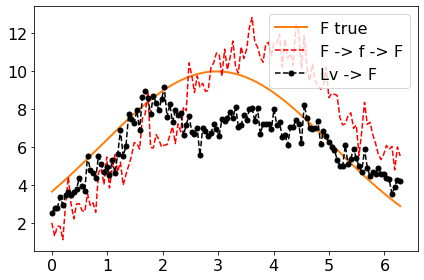

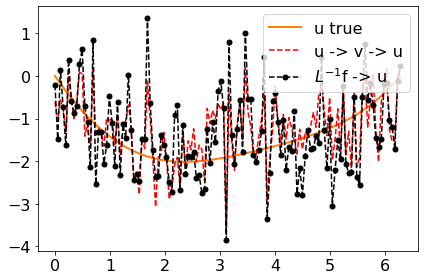

In [9]:
plot_model_prediction(model, 40, data_val_u, data_val_f)

In [11]:
# Example of how to obtain the operator:
L = model.Operator.get_operator()
#print(L)

# Example of how to save the models' weights
model.save_weights("./data/subclass_demo_weights.tf")